In [61]:
# New dataset with QAT + Entire pipeline 
# Input: Image
# Output: CSV + model fitting + QAT modelling + TFLite file

In [62]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler
import cv2
import os
import matplotlib
from skimage import color

### Loading all the images

In [63]:
# Loading all the ppm day_1 images in an array
path_day_1 = 'C:\\Users\\yashp\\OneDrive\\Desktop\\Day_1_AutoML\\Day_1\\Renamed_filtered\\Day_1\\PPMS'
day_1_images = []
for ind, i in enumerate(os.listdir(path_day_1)):
    day_1_images.append(cv2.cvtColor(cv2.imread(path_day_1+'/'+i),cv2.COLOR_BGR2RGB))
day_1_images = np.array(day_1_images)
day_1_images.shape

(111, 64, 64, 3)

In [64]:
# Loading all the ppm day_2 images in an array
path_day_2 = 'C:\\Users\\yashp\\OneDrive\\Desktop\\Day_1_AutoML\\Day_1\\Renamed_filtered\\Day_2\\PPMS'
day_2_images = []
for ind, i in enumerate(os.listdir(path_day_2)):
    day_2_images.append(cv2.cvtColor(cv2.imread(path_day_2+'/'+i),cv2.COLOR_BGR2RGB))
day_2_images = np.array(day_2_images)
day_2_images.shape

(150, 64, 64, 3)

In [65]:
# Loading all the ppm day_3 images in an array
path_day_3 = 'C:\\Users\\yashp\\OneDrive\\Desktop\\Day_1_AutoML\\Day_1\\Renamed_filtered\\Day_3\\PPMS'
day_3_images = []
for ind, i in enumerate(os.listdir(path_day_3)):
    day_3_images.append(cv2.cvtColor(cv2.imread(path_day_3+'/'+i),cv2.COLOR_BGR2RGB))
day_3_images = np.array(day_3_images)
day_3_images.shape

(188, 64, 64, 3)

### Making HSV images

In [66]:
# Converting all day_1 images into HSV
hsv_day_1_images = []
for i in day_1_images:
    hsv_day_1_images.append(matplotlib.colors.rgb_to_hsv(i))
hsv_day_1_images = np.array(hsv_day_1_images)
hsv_day_1_images.shape

(111, 64, 64, 3)

In [67]:
# Converting all day_2 images into HSV
hsv_day_2_images = []
for i in day_2_images:
    hsv_day_2_images.append(matplotlib.colors.rgb_to_hsv(i))
hsv_day_2_images = np.array(hsv_day_2_images)
hsv_day_2_images.shape

(150, 64, 64, 3)

In [68]:
# Converting all day_3 images into HSV
hsv_day_3_images = []
for i in day_3_images:
    hsv_day_3_images.append(matplotlib.colors.rgb_to_hsv(i))
hsv_day_3_images = np.array(hsv_day_3_images)
hsv_day_3_images.shape

(188, 64, 64, 3)

### Making LAB images

In [69]:
# Converting all day_1 images into LAB
lab_day_1_images = []
for i in day_1_images:
    lab_day_1_images.append(color.rgb2lab(i))
lab_day_1_images = np.array(lab_day_1_images)
lab_day_1_images.shape

(111, 64, 64, 3)

In [70]:
# Converting all day_2 images into LAB
lab_day_2_images = []
for i in day_2_images:
    lab_day_2_images.append(color.rgb2lab(i))
lab_day_2_images = np.array(lab_day_2_images)
lab_day_2_images.shape

(150, 64, 64, 3)

In [71]:
# Converting all day_1 images into LAB
lab_day_3_images = []
for i in day_3_images:
    lab_day_3_images.append(color.rgb2lab(i))
lab_day_3_images = np.array(lab_day_3_images)
lab_day_3_images.shape

(188, 64, 64, 3)

### Random images generation

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


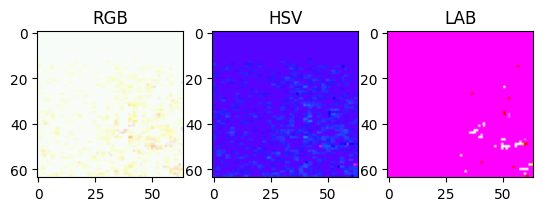

In [72]:
# Day 1 images
fig, axs = plt.subplots(1, 3)
r_ind = np.random.randint(day_1_images.shape[0])
# Display each image in a separate subplot
axs[0].imshow(day_1_images[r_ind])
axs[0].set_title('RGB')
axs[1].imshow(hsv_day_1_images[r_ind])
axs[1].set_title('HSV')
axs[2].imshow(lab_day_1_images[r_ind])
axs[2].set_title('LAB')

# Show the plot
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


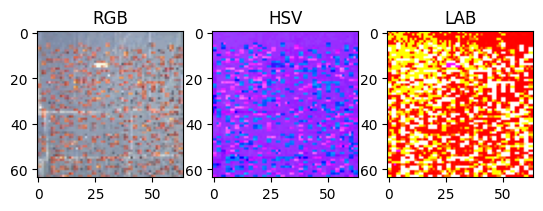

In [73]:
# Day 2 images
fig, axs = plt.subplots(1, 3)
r_ind = np.random.randint(day_2_images.shape[0])
# Display each image in a separate subplot
axs[0].imshow(day_2_images[r_ind])
axs[0].set_title('RGB')
axs[1].imshow(hsv_day_2_images[r_ind])
axs[1].set_title('HSV')
axs[2].imshow(lab_day_2_images[r_ind])
axs[2].set_title('LAB')

# Show the plot
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


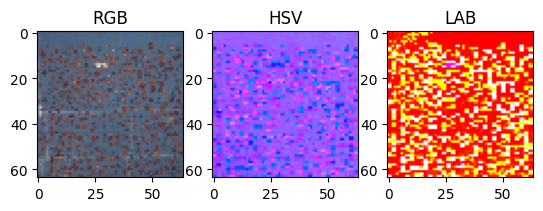

In [74]:
# Day 3 images
# Day 1 images
fig, axs = plt.subplots(1, 3)
r_ind = np.random.randint(day_3_images.shape[0])
# Display each image in a separate subplot
axs[0].imshow(day_3_images[r_ind])
axs[0].set_title('RGB')
axs[1].imshow(hsv_day_3_images[r_ind])
axs[1].set_title('HSV')
axs[2].imshow(lab_day_3_images[r_ind])
axs[2].set_title('LAB')

# Show the plot
plt.show()

### Making the CSV files

In [75]:
def conver(class123,channel):
    meanlist = []
    stdlist = []
    minlist = []
    maxlist = []
    varlist = []
    for i in range(class123.shape[0]):
        meanlist.append(np.mean(class123[i,:,:,channel])),
        stdlist.append(np.std(class123[i,:,:,channel])),
        minlist.append(np.min(class123[i,:,:,channel])),
        maxlist.append(np.max(class123[i,:,:,channel])),
        varlist.append(np.var(class123[i,:,:,channel])),
    meanlist = np.array(meanlist,dtype='float32')
    stdlist = np.array(stdlist,dtype='float32')
    minlist = np.array(minlist,dtype='int32')
    maxlist = np.array(maxlist,dtype='int32')
    varlist = np.array(varlist,dtype='float32')
    return meanlist,stdlist,minlist,maxlist,varlist

In [76]:
mean1, std1, min1, max1, var1 = conver(day_1_images,0)
mean2, std2, min2, max2, var2 = conver(day_1_images,1)
mean3, std3, min3, max3, var3 = conver(day_1_images,2)

mean4, std4, min4, max4, var4 = conver(hsv_day_1_images,0)
mean5, std5, min5, max5, var5 = conver(hsv_day_1_images,1)
mean6, std6, min6, max6, var6 = conver(hsv_day_1_images,2)

mean7, std7, min7, max7, var7 = conver(lab_day_1_images,0)
mean8, std8, min8, max8, var8 = conver(lab_day_1_images,1)
mean9, std9, min9, max9, var9 = conver(lab_day_1_images,2)

In [77]:
cl1_df = pd.DataFrame()

In [78]:
cl1_df['mean_r'] = mean1
cl1_df['std_r'] = std1 
cl1_df['min_r'] = min1
cl1_df['max_r'] = max1
cl1_df['var_r'] = var1

cl1_df['mean_g'] = mean2
cl1_df['std_g'] = std2
cl1_df['min_g'] = min2
cl1_df['max_g'] = max2
cl1_df['var_g'] = var2

cl1_df['mean_b'] = mean3
cl1_df['std_b'] = std3
cl1_df['min_b'] = min3
cl1_df['max_b'] = max3
cl1_df['var_b'] = var3

cl1_df['mean_h'] = mean4
cl1_df['std_h'] = std4 
cl1_df['min_h'] = min4
cl1_df['max_h'] = max4
cl1_df['var_h'] = var4

cl1_df['mean_s'] = mean5
cl1_df['std_s'] = std5
cl1_df['min_s'] = min5
cl1_df['max_s'] = max5
cl1_df['var_s'] = var5

cl1_df['mean_v'] = mean6
cl1_df['std_v'] = std6
cl1_df['min_v'] = min6
cl1_df['max_v'] = max6
cl1_df['var_v'] = var6

cl1_df['mean_l'] = mean7
cl1_df['std_l'] = std7
cl1_df['min_l'] = min7
cl1_df['max_l'] = max7
cl1_df['var_l'] = var7

cl1_df['mean_a'] = mean8
cl1_df['std_a'] = std8
cl1_df['min_a'] = min8
cl1_df['max_a'] = max8
cl1_df['var_a'] = var8

cl1_df['mean_b1'] = mean9
cl1_df['std_b1'] = std9
cl1_df['min_b1'] = min9
cl1_df['max_b1'] = max9
cl1_df['var_b1'] = var9

cl1_df

,mean_r,std_r,min_r,max_r,var_r,mean_g,std_g,min_g,max_g,var_g,...,mean_a,std_a,min_a,max_a,var_a,mean_b1,std_b1,min_b1,max_b1,var_b1
0,247.068359,7.415620,128,248,54.991421,248.497070,12.394516,92,252,153.624008,...,-4.318130,4.506680,-18,25,20.310160,11.873751,13.650517,-17,68,186.336624
1,247.849609,1.487198,216,248,2.211758,250.097656,6.781627,184,252,45.990463,...,-4.376608,3.927215,-19,18,15.423016,10.871710,12.343535,-5,65,152.362885
2,247.878906,1.268990,224,248,1.610336,250.358398,6.200150,188,252,38.441864,...,-4.338687,3.725428,-19,17,13.878817,10.415691,11.806664,-4,65,139.397308
3,247.896484,1.226748,216,248,1.504910,250.635742,5.571458,188,252,31.041145,...,-4.352789,3.622292,-19,15,13.120997,10.122630,11.616109,-5,65,134.933975
4,247.916016,1.064693,216,248,1.133572,250.876953,4.936758,192,252,24.371578,...,-4.257624,3.443273,-18,14,11.856128,9.511590,11.032106,-4,61,121.707367
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,220.408203,23.251793,144,248,540.645874,183.434570,25.748266,88,252,662.973267,...,12.132936,12.784688,-16,57,163.448242,12.790504,17.196478,-7,68,295.718842
107,219.257812,24.460026,136,248,598.292908,181.778320,27.255548,88,252,742.864929,...,12.425775,13.055315,-16,58,170.441254,12.679663,17.209827,-7,66,296.178131
108,213.755859,26.778807,136,248,717.104431,175.222656,26.573696,84,252,706.161377,...,13.282067,13.660368,-16,60,186.605667,11.801290,17.564184,-8,68,308.500580
109,207.263672,28.742472,128,248,826.129700,169.047852,26.296232,84,252,691.491821,...,13.931546,14.369800,-15,58,206.491135,9.732851,17.607370,-9,65,310.019531


In [79]:
cl1_df ['Target'] = 0
cl1_df

,mean_r,std_r,min_r,max_r,var_r,mean_g,std_g,min_g,max_g,var_g,...,std_a,min_a,max_a,var_a,mean_b1,std_b1,min_b1,max_b1,var_b1,Target
0,247.068359,7.415620,128,248,54.991421,248.497070,12.394516,92,252,153.624008,...,4.506680,-18,25,20.310160,11.873751,13.650517,-17,68,186.336624,0
1,247.849609,1.487198,216,248,2.211758,250.097656,6.781627,184,252,45.990463,...,3.927215,-19,18,15.423016,10.871710,12.343535,-5,65,152.362885,0
2,247.878906,1.268990,224,248,1.610336,250.358398,6.200150,188,252,38.441864,...,3.725428,-19,17,13.878817,10.415691,11.806664,-4,65,139.397308,0
3,247.896484,1.226748,216,248,1.504910,250.635742,5.571458,188,252,31.041145,...,3.622292,-19,15,13.120997,10.122630,11.616109,-5,65,134.933975,0
4,247.916016,1.064693,216,248,1.133572,250.876953,4.936758,192,252,24.371578,...,3.443273,-18,14,11.856128,9.511590,11.032106,-4,61,121.707367,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,220.408203,23.251793,144,248,540.645874,183.434570,25.748266,88,252,662.973267,...,12.784688,-16,57,163.448242,12.790504,17.196478,-7,68,295.718842,0
107,219.257812,24.460026,136,248,598.292908,181.778320,27.255548,88,252,742.864929,...,13.055315,-16,58,170.441254,12.679663,17.209827,-7,66,296.178131,0
108,213.755859,26.778807,136,248,717.104431,175.222656,26.573696,84,252,706.161377,...,13.660368,-16,60,186.605667,11.801290,17.564184,-8,68,308.500580,0
109,207.263672,28.742472,128,248,826.129700,169.047852,26.296232,84,252,691.491821,...,14.369800,-15,58,206.491135,9.732851,17.607370,-9,65,310.019531,0


In [80]:
mean1, std1, min1, max1, var1 = conver(day_2_images,0)
mean2, std2, min2, max2, var2 = conver(day_2_images,1)
mean3, std3, min3, max3, var3 = conver(day_2_images,2)

mean4, std4, min4, max4, var4 = conver(hsv_day_2_images,0)
mean5, std5, min5, max5, var5 = conver(hsv_day_2_images,1)
mean6, std6, min6, max6, var6 = conver(hsv_day_2_images,2)

mean7, std7, min7, max7, var7 = conver(lab_day_2_images,0)
mean8, std8, min8, max8, var8 = conver(lab_day_2_images,1)
mean9, std9, min9, max9, var9 = conver(lab_day_2_images,2)

In [81]:
cl2_df = pd.DataFrame()

In [82]:
cl2_df['mean_r'] = mean1
cl2_df['std_r'] = std1 
cl2_df['min_r'] = min1
cl2_df['max_r'] = max1
cl2_df['var_r'] = var1

cl2_df['mean_g'] = mean2
cl2_df['std_g'] = std2
cl2_df['min_g'] = min2
cl2_df['max_g'] = max2
cl2_df['var_g'] = var2

cl2_df['mean_b'] = mean3
cl2_df['std_b'] = std3
cl2_df['min_b'] = min3
cl2_df['max_b'] = max3
cl2_df['var_b'] = var3

cl2_df['mean_h'] = mean4
cl2_df['std_h'] = std4 
cl2_df['min_h'] = min4
cl2_df['max_h'] = max4
cl2_df['var_h'] = var4

cl2_df['mean_s'] = mean5
cl2_df['std_s'] = std5
cl2_df['min_s'] = min5
cl2_df['max_s'] = max5
cl2_df['var_s'] = var5

cl2_df['mean_v'] = mean6
cl2_df['std_v'] = std6
cl2_df['min_v'] = min6
cl2_df['max_v'] = max6
cl2_df['var_v'] = var6

cl2_df['mean_l'] = mean7
cl2_df['std_l'] = std7
cl2_df['min_l'] = min7
cl2_df['max_l'] = max7
cl2_df['var_l'] = var7

cl2_df['mean_a'] = mean8
cl2_df['std_a'] = std8
cl2_df['min_a'] = min8
cl2_df['max_a'] = max8
cl2_df['var_a'] = var8

cl2_df['mean_b1'] = mean9
cl2_df['std_b1'] = std9
cl2_df['min_b1'] = min9
cl2_df['max_b1'] = max9
cl2_df['var_b1'] = var9

cl2_df

,mean_r,std_r,min_r,max_r,var_r,mean_g,std_g,min_g,max_g,var_g,...,mean_a,std_a,min_a,max_a,var_a,mean_b1,std_b1,min_b1,max_b1,var_b1
0,244.431641,9.246685,152,248,85.501190,235.170898,22.760044,116,252,518.019592,...,1.927100,7.339437,-16,49,53.867344,5.999698,10.697090,-7,54,114.427734
1,245.498047,7.506638,160,248,56.349606,238.622070,19.627481,128,252,385.238037,...,0.995445,6.380447,-16,44,40.710106,5.789333,10.304381,-7,58,106.180275
2,245.773438,7.166234,160,248,51.354919,239.349609,19.190422,128,252,368.272308,...,0.767245,6.210449,-15,44,38.569679,5.906173,10.211851,-7,54,104.281906
3,246.216797,6.532959,160,248,42.679562,241.201172,17.948345,132,252,322.143127,...,0.240578,5.790886,-17,43,33.534363,5.731565,9.850948,-5,57,97.041176
4,246.466797,6.114218,168,248,37.383663,242.205078,17.217728,132,252,296.450134,...,-0.016780,5.577125,-17,44,31.104321,5.555195,9.506277,-6,54,90.369301
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,65.759766,15.305639,16,160,234.262604,68.844727,13.681124,16,164,187.173157,...,1.951950,7.426554,-9,29,55.153698,-5.881501,7.566823,-16,22,57.256817
146,47.103516,12.537172,8,128,157.180695,46.794922,11.426093,4,124,130.555603,...,2.832929,6.416898,-6,29,41.176579,-4.581858,6.705154,-12,23,44.959091
147,25.525391,9.136195,0,88,83.470062,24.442383,8.034812,0,88,64.558205,...,2.261461,4.374535,-3,22,19.136559,-3.410695,4.795624,-11,18,22.998007
148,24.244141,4.277823,16,64,18.299770,23.454102,3.592913,16,60,12.909026,...,0.670630,2.142695,-6,12,4.591143,-0.464677,2.172979,-6,10,4.721837


In [83]:
cl2_df ['Target'] = 1
cl2_df

,mean_r,std_r,min_r,max_r,var_r,mean_g,std_g,min_g,max_g,var_g,...,std_a,min_a,max_a,var_a,mean_b1,std_b1,min_b1,max_b1,var_b1,Target
0,244.431641,9.246685,152,248,85.501190,235.170898,22.760044,116,252,518.019592,...,7.339437,-16,49,53.867344,5.999698,10.697090,-7,54,114.427734,1
1,245.498047,7.506638,160,248,56.349606,238.622070,19.627481,128,252,385.238037,...,6.380447,-16,44,40.710106,5.789333,10.304381,-7,58,106.180275,1
2,245.773438,7.166234,160,248,51.354919,239.349609,19.190422,128,252,368.272308,...,6.210449,-15,44,38.569679,5.906173,10.211851,-7,54,104.281906,1
3,246.216797,6.532959,160,248,42.679562,241.201172,17.948345,132,252,322.143127,...,5.790886,-17,43,33.534363,5.731565,9.850948,-5,57,97.041176,1
4,246.466797,6.114218,168,248,37.383663,242.205078,17.217728,132,252,296.450134,...,5.577125,-17,44,31.104321,5.555195,9.506277,-6,54,90.369301,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,65.759766,15.305639,16,160,234.262604,68.844727,13.681124,16,164,187.173157,...,7.426554,-9,29,55.153698,-5.881501,7.566823,-16,22,57.256817,1
146,47.103516,12.537172,8,128,157.180695,46.794922,11.426093,4,124,130.555603,...,6.416898,-6,29,41.176579,-4.581858,6.705154,-12,23,44.959091,1
147,25.525391,9.136195,0,88,83.470062,24.442383,8.034812,0,88,64.558205,...,4.374535,-3,22,19.136559,-3.410695,4.795624,-11,18,22.998007,1
148,24.244141,4.277823,16,64,18.299770,23.454102,3.592913,16,60,12.909026,...,2.142695,-6,12,4.591143,-0.464677,2.172979,-6,10,4.721837,1


In [84]:
mean1, std1, min1, max1, var1 = conver(day_3_images,0)
mean2, std2, min2, max2, var2 = conver(day_3_images,1)
mean3, std3, min3, max3, var3 = conver(day_3_images,2)

mean4, std4, min4, max4, var4 = conver(hsv_day_3_images,0)
mean5, std5, min5, max5, var5 = conver(hsv_day_3_images,1)
mean6, std6, min6, max6, var6 = conver(hsv_day_3_images,2)

mean7, std7, min7, max7, var7 = conver(lab_day_3_images,0)
mean8, std8, min8, max8, var8 = conver(lab_day_3_images,1)
mean9, std9, min9, max9, var9 = conver(lab_day_3_images,2)

In [85]:
cl3_df = pd.DataFrame()

In [86]:
cl3_df['mean_r'] = mean1
cl3_df['std_r'] = std1 
cl3_df['min_r'] = min1
cl3_df['max_r'] = max1
cl3_df['var_r'] = var1

cl3_df['mean_g'] = mean2
cl3_df['std_g'] = std2
cl3_df['min_g'] = min2
cl3_df['max_g'] = max2
cl3_df['var_g'] = var2

cl3_df['mean_b'] = mean3
cl3_df['std_b'] = std3
cl3_df['min_b'] = min3
cl3_df['max_b'] = max3
cl3_df['var_b'] = var3

cl3_df['mean_h'] = mean4
cl3_df['std_h'] = std4 
cl3_df['min_h'] = min4
cl3_df['max_h'] = max4
cl3_df['var_h'] = var4

cl3_df['mean_s'] = mean5
cl3_df['std_s'] = std5
cl3_df['min_s'] = min5
cl3_df['max_s'] = max5
cl3_df['var_s'] = var5

cl3_df['mean_v'] = mean6
cl3_df['std_v'] = std6
cl3_df['min_v'] = min6
cl3_df['max_v'] = max6
cl3_df['var_v'] = var6

cl3_df['mean_v'] = mean6
cl3_df['std_v'] = std6
cl3_df['min_v'] = min6
cl3_df['max_v'] = max6
cl3_df['var_v'] = var6

cl3_df['mean_l'] = mean7
cl3_df['std_l'] = std7
cl3_df['min_l'] = min7
cl3_df['max_l'] = max7
cl3_df['var_l'] = var7

cl3_df['mean_a'] = mean8
cl3_df['std_a'] = std8
cl3_df['min_a'] = min8
cl3_df['max_a'] = max8
cl3_df['var_a'] = var8

cl3_df['mean_b1'] = mean9
cl3_df['std_b1'] = std9
cl3_df['min_b1'] = min9
cl3_df['max_b1'] = max9
cl3_df['var_b1'] = var9

cl3_df

,mean_r,std_r,min_r,max_r,var_r,mean_g,std_g,min_g,max_g,var_g,...,mean_a,std_a,min_a,max_a,var_a,mean_b1,std_b1,min_b1,max_b1,var_b1
0,16.496094,2.031967,16,40,4.128891,20.203125,1.333811,16,36,1.779053,...,-2.220038,0.970528,-5,3,0.941925,1.582374,0.972625,-3,4,0.945999
1,25.121094,3.656248,16,64,13.368149,26.753906,3.319271,20,60,11.017563,...,-0.413697,1.879925,-5,10,3.534118,-0.963364,2.272755,-5,8,5.165417
2,22.298828,9.050021,0,96,81.902893,23.212891,8.161791,0,88,66.614838,...,1.729865,3.834764,-5,18,14.705416,-4.477213,4.947777,-12,15,24.480495
3,43.050781,11.906100,8,136,141.755234,45.270508,11.608484,8,128,134.756897,...,1.941425,5.892717,-6,28,34.724113,-5.260230,6.499729,-15,22,42.246471
4,61.988281,15.239234,16,176,232.234238,67.324219,14.039160,16,168,197.098007,...,1.560529,7.047499,-6,29,49.667248,-7.079423,7.713660,-16,22,59.500557
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183,185.318359,26.553532,88,248,705.090027,164.212891,25.057777,72,252,627.892151,...,8.400492,11.670238,-12,47,136.194443,3.528605,12.267705,-9,53,150.496582
184,180.847656,25.903671,88,248,671.000244,162.835938,25.046450,64,252,627.324646,...,7.729246,11.307699,-11,45,127.864052,1.812102,12.047604,-10,49,145.144760
185,176.138672,25.751144,80,248,663.121399,160.673828,25.112385,64,252,630.631897,...,7.169503,11.131242,-16,47,123.904541,0.478765,11.825370,-13,49,139.839371
186,171.228516,25.513449,72,248,650.936035,157.438477,24.809689,64,252,615.520630,...,6.856700,10.946127,-15,44,119.817703,-0.504751,11.676307,-13,48,136.336136


In [87]:
cl3_df ['Target'] = 2
cl3_df

,mean_r,std_r,min_r,max_r,var_r,mean_g,std_g,min_g,max_g,var_g,...,std_a,min_a,max_a,var_a,mean_b1,std_b1,min_b1,max_b1,var_b1,Target
0,16.496094,2.031967,16,40,4.128891,20.203125,1.333811,16,36,1.779053,...,0.970528,-5,3,0.941925,1.582374,0.972625,-3,4,0.945999,2
1,25.121094,3.656248,16,64,13.368149,26.753906,3.319271,20,60,11.017563,...,1.879925,-5,10,3.534118,-0.963364,2.272755,-5,8,5.165417,2
2,22.298828,9.050021,0,96,81.902893,23.212891,8.161791,0,88,66.614838,...,3.834764,-5,18,14.705416,-4.477213,4.947777,-12,15,24.480495,2
3,43.050781,11.906100,8,136,141.755234,45.270508,11.608484,8,128,134.756897,...,5.892717,-6,28,34.724113,-5.260230,6.499729,-15,22,42.246471,2
4,61.988281,15.239234,16,176,232.234238,67.324219,14.039160,16,168,197.098007,...,7.047499,-6,29,49.667248,-7.079423,7.713660,-16,22,59.500557,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183,185.318359,26.553532,88,248,705.090027,164.212891,25.057777,72,252,627.892151,...,11.670238,-12,47,136.194443,3.528605,12.267705,-9,53,150.496582,2
184,180.847656,25.903671,88,248,671.000244,162.835938,25.046450,64,252,627.324646,...,11.307699,-11,45,127.864052,1.812102,12.047604,-10,49,145.144760,2
185,176.138672,25.751144,80,248,663.121399,160.673828,25.112385,64,252,630.631897,...,11.131242,-16,47,123.904541,0.478765,11.825370,-13,49,139.839371,2
186,171.228516,25.513449,72,248,650.936035,157.438477,24.809689,64,252,615.520630,...,10.946127,-15,44,119.817703,-0.504751,11.676307,-13,48,136.336136,2


In [88]:
rhl = np.concatenate((cl1_df, cl2_df, cl3_df),axis=0)
rhl = pd.DataFrame(rhl,columns=['mean_r','std_r', 'min_r','max_r','var_r','mean_g','std_g', 'min_g','max_g','var_g','mean_b','std_b', 'min_b','max_b','var_b', 'mean_h','std_h', 'min_h','max_h','var_h','mean_s','std_s', 'min_s','max_s','var_s','mean_v','std_v', 'min_v','max_v','var_v', 'mean_l','std_l', 'min_l','max_l','var_l','mean_a','std_a', 'min_a','max_a','var_a','mean_b1','std_b1', 'min_b1','max_b1','var_b1','Target'])
rhl

,mean_r,std_r,min_r,max_r,var_r,mean_g,std_g,min_g,max_g,var_g,...,std_a,min_a,max_a,var_a,mean_b1,std_b1,min_b1,max_b1,var_b1,Target
0,247.068359,7.415620,128.0,248.0,54.991421,248.497070,12.394516,92.0,252.0,153.624008,...,4.506680,-18.0,25.0,20.310160,11.873751,13.650517,-17.0,68.0,186.336624,0.0
1,247.849609,1.487198,216.0,248.0,2.211758,250.097656,6.781627,184.0,252.0,45.990463,...,3.927215,-19.0,18.0,15.423016,10.871710,12.343535,-5.0,65.0,152.362885,0.0
2,247.878906,1.268990,224.0,248.0,1.610336,250.358398,6.200150,188.0,252.0,38.441864,...,3.725428,-19.0,17.0,13.878817,10.415691,11.806664,-4.0,65.0,139.397308,0.0
3,247.896484,1.226748,216.0,248.0,1.504910,250.635742,5.571458,188.0,252.0,31.041145,...,3.622292,-19.0,15.0,13.120997,10.122630,11.616109,-5.0,65.0,134.933975,0.0
4,247.916016,1.064693,216.0,248.0,1.133572,250.876953,4.936758,192.0,252.0,24.371578,...,3.443273,-18.0,14.0,11.856128,9.511590,11.032106,-4.0,61.0,121.707367,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
444,185.318359,26.553532,88.0,248.0,705.090027,164.212891,25.057777,72.0,252.0,627.892151,...,11.670238,-12.0,47.0,136.194443,3.528605,12.267705,-9.0,53.0,150.496582,2.0
445,180.847656,25.903671,88.0,248.0,671.000244,162.835938,25.046450,64.0,252.0,627.324646,...,11.307699,-11.0,45.0,127.864052,1.812102,12.047604,-10.0,49.0,145.144760,2.0
446,176.138672,25.751144,80.0,248.0,663.121399,160.673828,25.112385,64.0,252.0,630.631897,...,11.131242,-16.0,47.0,123.904541,0.478765,11.825370,-13.0,49.0,139.839371,2.0
447,171.228516,25.513449,72.0,248.0,650.936035,157.438477,24.809689,64.0,252.0,615.520630,...,10.946127,-15.0,44.0,119.817703,-0.504751,11.676307,-13.0,48.0,136.336136,2.0


In [89]:
# Saving the dataset 
rhl.to_csv("phase_2_rgbhsvlab_withoutbg.csv", index=False)

In [90]:
y = rhl['Target']

rhl.drop('Target', inplace=True, axis=1)

x = rhl
print(x.shape,y.shape)

(449, 45) (449,)


In [91]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2, random_state = 42)
print(x_train.shape,y_train.shape,x_test.shape,y_test.shape)

(359, 45) (359,) (90, 45) (90,)


In [92]:
# # x_test into a csv file
# x_test.to_csv('test_data_input.csv')
# y_test.to_csv('test_data_output.csv')

In [93]:
x_train

,mean_r,std_r,min_r,max_r,var_r,mean_g,std_g,min_g,max_g,var_g,...,mean_a,std_a,min_a,max_a,var_a,mean_b1,std_b1,min_b1,max_b1,var_b1
17,247.974609,0.544270,232.0,248.0,0.296230,251.429688,3.600528,184.0,252.0,12.963806,...,-3.311305,2.601172,-16.0,20.0,6.766095,5.937703,8.090723,-5.0,58.0,65.459793
66,247.712891,2.324208,192.0,248.0,5.401943,248.041992,9.612116,176.0,252.0,92.392769,...,-3.012384,4.115195,-16.0,24.0,16.934830,9.030621,11.759205,-4.0,55.0,138.278900
176,247.738281,2.357224,200.0,248.0,5.556503,249.934570,7.448496,176.0,252.0,55.480095,...,-2.139206,2.657902,-14.0,22.0,7.064444,3.938843,6.452703,-3.0,42.0,41.637383
247,129.761719,24.667591,56.0,248.0,608.490112,121.415039,20.521179,40.0,252.0,421.118744,...,6.451426,10.770576,-6.0,45.0,116.005310,-4.403704,11.853439,-18.0,43.0,140.504013
31,247.962891,0.759439,224.0,248.0,0.576748,251.567383,2.648030,208.0,252.0,7.012061,...,-3.308691,2.455698,-15.0,12.0,6.030451,5.726631,7.702614,-1.0,48.0,59.330269
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,220.408203,23.251793,144.0,248.0,540.645874,183.434570,25.748266,88.0,252.0,662.973267,...,12.132936,12.784688,-16.0,57.0,163.448242,12.790504,17.196478,-7.0,68.0,295.718842
270,106.478516,21.213146,40.0,248.0,449.997589,105.868164,18.624533,36.0,240.0,346.873230,...,5.121629,8.664259,-5.0,35.0,75.069389,-9.035880,10.842826,-21.0,31.0,117.566879
348,247.558594,3.287120,192.0,248.0,10.805161,250.025391,7.572007,168.0,252.0,57.335293,...,-2.063532,2.417838,-14.0,27.0,5.845942,3.371449,5.380074,-3.0,42.0,28.945189
435,206.962891,25.230860,104.0,248.0,636.596252,182.044922,25.968992,84.0,252.0,674.388611,...,8.724564,11.138253,-11.0,48.0,124.060677,6.516893,12.442735,-9.0,55.0,154.821640


In [94]:
scaler = MinMaxScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

In [95]:
x_train

array([[9.99991536e-01, 5.09030199e-04, 1.00000000e+00, ...,
        7.72727273e-01, 8.41269841e-01, 2.00707804e-01],
       [9.98857356e-01, 6.31738743e-02, 8.27586207e-01, ...,
        8.18181818e-01, 7.93650794e-01, 4.25778887e-01],
       [9.98967388e-01, 6.43362328e-02, 8.62068966e-01, ...,
        8.63636364e-01, 5.87301587e-01, 1.27076913e-01],
       ...,
       [9.98188697e-01, 9.70743614e-02, 8.27586207e-01, ...,
        8.63636364e-01, 5.87301587e-01, 8.78475686e-02],
       [8.22263790e-01, 8.69630117e-01, 4.48275862e-01, ...,
        5.90909091e-01, 7.93650794e-01, 4.76909593e-01],
       [8.85126156e-01, 8.19136832e-01, 6.20689655e-01, ...,
        6.36363636e-01, 9.84126984e-01, 9.96488866e-01]])

In [96]:
inputs = tf.keras.Input(shape=(45,))

x = tf.keras.layers.Dense(40,activation='relu')(inputs)
x = tf.keras.layers.Dense(20,activation='relu')(x)
x = tf.keras.layers.Dropout(0.25)(x)

output = tf.keras.layers.Dense(3,activation='softmax')(x)

model = tf.keras.Model(inputs=inputs,outputs=output)
#print(type())
model.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 45)]              0         
                                                                 
 dense_6 (Dense)             (None, 40)                1840      
                                                                 
 dense_7 (Dense)             (None, 20)                820       
                                                                 
 dropout_2 (Dropout)         (None, 20)                0         
                                                                 
 dense_8 (Dense)             (None, 3)                 63        
                                                                 
Total params: 2723 (10.64 KB)
Trainable params: 2723 (10.64 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [97]:
model.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.0005),
    metrics=["accuracy"],
)

In [98]:
model.fit(x_train, y_train, batch_size=32, epochs=150, validation_split=0.2)
test_score = model.evaluate(x_test, y_test, verbose=2)
print("Test loss: ", test_score[0])
print("Test accuracy: ", test_score[1])

Epoch 1/150


C:\Users\yashp\AppData\Roaming\Python\Python311\site-packages\keras\src\backend.py:5714: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


9/9 [==============================] - 10s 152ms/step - loss: 1.2564 - accuracy: 0.2927 - val_loss: 1.1000 - val_accuracy: 0.3889
Epoch 2/150
9/9 [==============================] - 0s 21ms/step - loss: 1.1467 - accuracy: 0.3589 - val_loss: 1.0735 - val_accuracy: 0.4861
Epoch 3/150
9/9 [==============================] - 0s 18ms/step - loss: 1.1106 - accuracy: 0.3345 - val_loss: 1.0727 - val_accuracy: 0.4722
Epoch 4/150
9/9 [==============================] - 0s 15ms/step - loss: 1.0806 - accuracy: 0.4321 - val_loss: 1.0730 - val_accuracy: 0.4583
Epoch 5/150
9/9 [==============================] - 0s 10ms/step - loss: 1.0820 - accuracy: 0.4216 - val_loss: 1.0670 - val_accuracy: 0.4583
Epoch 6/150
9/9 [==============================] - 0s 15ms/step - loss: 1.0765 - accuracy: 0.4390 - val_loss: 1.0605 - val_accuracy: 0.4583
Epoch 7/150
9/9 [==============================] - 0s 9ms/step - loss: 1.0614 - accuracy: 0.4460 - val_loss: 1.0550 - val_accuracy: 0.4583
Epoch 8/150
9/9 [==============

## QUANT AWARE TRAINING

In [99]:
import tensorflow_model_optimization as tfmot

quantize_model = tfmot.quantization.keras.quantize_model

q_aware_model = quantize_model(model)

q_aware_model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

q_aware_model.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 45)]              0         
                                                                 
 quantize_layer_1 (Quantize  (None, 45)                3         
 Layer)                                                          
                                                                 
 quant_dense_6 (QuantizeWra  (None, 40)                1845      
 pperV2)                                                         
                                                                 
 quant_dense_7 (QuantizeWra  (None, 20)                825       
 pperV2)                                                         
                                                                 
 quant_dropout_2 (QuantizeW  (None, 20)                1         
 rapperV2)                                                 

In [100]:
q_aware_model.fit(x_train, y_train, epochs=50, validation_split=0.1)

Epoch 1/50
11/11 [==============================] - 2s 41ms/step - loss: 0.3919 - accuracy: 0.8390 - val_loss: 0.3397 - val_accuracy: 0.9167
Epoch 2/50
11/11 [==============================] - 0s 8ms/step - loss: 0.4037 - accuracy: 0.8390 - val_loss: 0.3420 - val_accuracy: 0.9167
Epoch 3/50
11/11 [==============================] - 0s 8ms/step - loss: 0.4047 - accuracy: 0.8359 - val_loss: 0.3326 - val_accuracy: 0.9167
Epoch 4/50
11/11 [==============================] - 0s 8ms/step - loss: 0.3800 - accuracy: 0.8514 - val_loss: 0.3168 - val_accuracy: 0.9444
Epoch 5/50
11/11 [==============================] - 0s 13ms/step - loss: 0.3834 - accuracy: 0.8483 - val_loss: 0.3134 - val_accuracy: 0.9444
Epoch 6/50
11/11 [==============================] - 0s 9ms/step - loss: 0.3858 - accuracy: 0.8514 - val_loss: 0.3251 - val_accuracy: 0.9722
Epoch 7/50
11/11 [==============================] - 0s 12ms/step - loss: 0.3802 - accuracy: 0.8607 - val_loss: 0.3108 - val_accuracy: 0.9722
Epoch 8/50
11/11 

In [101]:
q_aware_model.evaluate(x_test,y_test)

3/3 [==============================] - 0s 5ms/step - loss: 0.2643 - accuracy: 0.9222


[0.26425468921661377, 0.9222221970558167]

##  model to tflite

In [102]:
# non quantized

In [103]:
converter = tf.lite.TFLiteConverter.from_keras_model(q_aware_model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]

quantized_tflite_model = converter.convert()

INFO:tensorflow:Assets written to: C:\Users\yashp\AppData\Local\Temp\tmpy90qyrhu\assets


INFO:tensorflow:Assets written to: C:\Users\yashp\AppData\Local\Temp\tmpy90qyrhu\assets
C:\Users\yashp\AppData\Roaming\Python\Python311\site-packages\tensorflow\lite\python\convert.py:887: UserWarning: Statistics for quantized inputs were expected, but not specified; continuing anyway.
  warnings.warn(


In [104]:
# file = open( '84_quantization_aware_model.tflite' , 'wb' ) 
# file.write( quantized_tflite_model )

In [105]:
with open('93_quantization_aware_model.tflite', 'wb') as f:
  f.write(quantized_tflite_model)

# float16 quantized

In [106]:
# converter2 = tf.lite.TFLiteConverter.from_keras_model(q_aware_model)
# converter2.optimizations = [tf.lite.Optimize.DEFAULT]

# converter2.target_spec.supported_types = [tf.float16]

# float16_quantized_tflite_model = converter2.convert()

In [107]:
# file = open( 'float16_quantized_model.tflite' , 'wb' ) 
# file.write( float16_quantized_tflite_model )